In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
review_df = pd.read_csv('review_df_wordcloud.csv')
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_count,business_rating_avg,prediction_open
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,169,3.0,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,144,5.0,1
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,181,4.0,0
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,273,4.0,1
4,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,103,3.5,1


In [14]:
review_df[review_df['prediction_open'] ==0]['business_id'].value_counts()

d_tRshM-w6S4QxE4VVi8tQ    23
9gObo5ltOMo6UgsaXaHPWA    19
uIZwBkvWicqyWraXvYOipw    13
SIoCIxjn4jLt2O-4DajWJw    10
Z5po0aTuzKKblek5y6Sp8Q    10
                          ..
jE8o7lX3NMmcG0iMlqoo7A     1
5RzKmxTSV0cP3I2dbXvIuA     1
qu0qoXXxVVDxMaof1SFzXg     1
iX-B-N84nktxvhSwTYSfDw     1
gJvHJcDBnrcIKDGo9_-v5Q     1
Name: business_id, Length: 816, dtype: int64

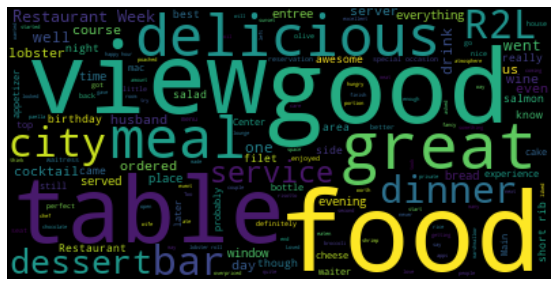

In [16]:
#font_path = 'cambriab.ttf'
business_cloud_id = '9gObo5ltOMo6UgsaXaHPWA'
wordcloud_df = review_df[review_df['business_id'] == business_cloud_id]
wordcloud_text = str(' '.join(wordcloud_df[wordcloud_df['prediction_open'] ==0]['text']))
wordcloud = WordCloud().generate(wordcloud_text) #font_path=font_path

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()